Class distribution:
Binary_Class
0    3493
1     523
Name: count, dtype: int64
SMOTE oversampling completed in 0.04 seconds.
Class weights: {0: 1.0, 1: 1.0}
Fitting 3 folds for each of 20 candidates, totalling 60 fits
RandomizedSearchCV completed in 441.48 seconds.
Model saved to random_forest_model.joblib
Accuracy: 0.849502487562189
Precision: 0.05555555555555555
Recall: 0.009523809523809525
F1 Score: 0.016260162601626018
ROC-AUC Score: 0.6293071735131821
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       699
           1       0.06      0.01      0.02       105

    accuracy                           0.85       804
   macro avg       0.46      0.49      0.47       804
weighted avg       0.76      0.85      0.80       804



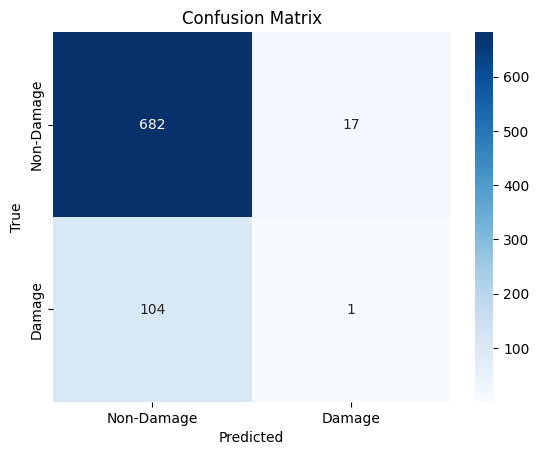

In [3]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import RandomizedSearchCV
import joblib
from gensim.models import Word2Vec
from imblearn.over_sampling import SMOTE
import time

# Path to the CSV file
file_path = '/content/Hurricane_irma_modified.csv'
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found: {file_path}")

# Load and preprocess data
data = pd.read_csv(file_path)
if 'processed_data' not in data.columns or 'Binary_Class' not in data.columns:
    raise KeyError("The dataset must contain 'processed_data' and 'Binary_Class' columns.")

data['processed_data'] = data['processed_data'].fillna('').astype(str)
data['Binary_Class'] = data['Binary_Class'].map({'Non-Damage': 0, 'Damage': 1})

# Check class distribution
print("Class distribution:")
print(data['Binary_Class'].value_counts())

# Tokenize and split data
sentences = [sentence.split() for sentence in data['processed_data']]
labels = data['Binary_Class'].values

# Train Word2Vec model
word2vec_model = Word2Vec(sentences, vector_size=300, window=5, min_count=1, sg=0)

# Create embedding matrix
vocab_size = len(word2vec_model.wv.index_to_key)
embedding_dim = word2vec_model.vector_size
word_index = {word: idx + 1 for idx, word in enumerate(word2vec_model.wv.index_to_key)}

# Convert sentences to sequences of indices
X = [[word_index.get(word, 0) for word in sentence] for sentence in sentences]

# Aggregate embeddings using mean embedding
X = np.array([np.mean([word2vec_model.wv[word] for word in sentence if word in word2vec_model.wv] or [np.zeros(embedding_dim)], axis=0) for sentence in sentences])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42, stratify=labels)

# Oversample the minority class using SMOTE
start_time = time.time()
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
print(f"SMOTE oversampling completed in {time.time() - start_time:.2f} seconds.")

# Calculate class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}
print("Class weights:", class_weights_dict)

# Hyperparameter tuning for Random Forest using RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestClassifier(class_weight=class_weights_dict, random_state=42)
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=20, cv=3, scoring='f1', verbose=1, n_jobs=-1, random_state=42)
start_time = time.time()
random_search.fit(X_train, y_train)
print(f"RandomizedSearchCV completed in {time.time() - start_time:.2f} seconds.")

# Best model
rf_model = random_search.best_estimator_

# Save the Random Forest model
model_path = 'random_forest_model.joblib'
joblib.dump(rf_model, model_path)
print(f"Model saved to {model_path}")

# Adjust threshold for classification
y_proba = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
threshold = 0.5  # Default threshold, can be optimized further
y_pred = (y_proba >= threshold).astype(int)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=1))
print("Recall:", recall_score(y_test, y_pred, zero_division=1))
print("F1 Score:", f1_score(y_test, y_pred, zero_division=1))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Damage', 'Damage'], yticklabels=['Non-Damage', 'Damage'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [26]:
# Import required libraries for data manipulation, visualization, model training, and evaluation
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import RandomizedSearchCV
import joblib
from gensim.models import Word2Vec
from imblearn.over_sampling import SMOTE
import time

print("Libraries imported successfully.")

Libraries imported successfully.


In [27]:
file_path = '/content/Hurricane_irma_original.csv'
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found: {file_path}")
else:
    print(f"File found at: {file_path}")

File found at: /content/Hurricane_irma_original.csv


In [31]:
# Load the dataset and check for required columns
data = pd.read_csv(file_path)
print(f"Dataset loaded successfully with shape: {data.shape}")

if 'processed_data' not in data.columns or 'Binary_Class' not in data.columns:
    raise KeyError("The dataset must contain 'processed_data' and 'Binary_Class' columns.")
else:
    print("Required columns are present in the dataset.")

# Preprocess data: fill missing values and map labels to binary values
data['processed_data'] = data['processed_data'].fillna('').astype(str)
data['Binary_Class'] = data['Binary_Class'].map({'Non-Damage': 0, 'Damage': 1})
print("Data preprocessing completed.")

Dataset loaded successfully with shape: (4016, 5)
Required columns are present in the dataset.
Data preprocessing completed.


In [32]:
# Check the distribution of the target class
print("Class distribution:")
print(data['Binary_Class'].value_counts())

Class distribution:
Binary_Class
0    3493
1     523
Name: count, dtype: int64


In [33]:
# Tokenize the 'processed_data' into lists of words
sentences = [sentence.split() for sentence in data['processed_data']]
labels = data['Binary_Class'].values
print(f"Tokenized {len(sentences)} sentences.")

Tokenized 4016 sentences.


In [14]:
## Cell 5: Tokenize and split data
sentences = [sentence.split() for sentence in data['processed_data']]
labels = data['Binary_Class'].values
print("Data tokenized.")


Data tokenized.


In [34]:
# Train a Word2Vec model to create word embeddings
word2vec_model = Word2Vec(sentences, vector_size=300, window=5, min_count=1, sg=0)
print("Word2Vec model trained successfully.")


Word2Vec model trained successfully.


In [35]:
# Create an embedding matrix using the trained Word2Vec model
vocab_size = len(word2vec_model.wv.index_to_key)
embedding_dim = word2vec_model.vector_size
word_index = {word: idx + 1 for idx, word in enumerate(word2vec_model.wv.index_to_key)}
print(f"Embedding matrix created with vocabulary size: {vocab_size} and embedding dimension: {embedding_dim}.")


Embedding matrix created with vocabulary size: 6553 and embedding dimension: 300.


In [36]:
# Convert tokenized sentences to sequences of indices and calculate mean embeddings
X = [[word_index.get(word, 0) for word in sentence] for sentence in sentences]

# Aggregate embeddings for each sentence using the mean of the word vectors
X = np.array([np.mean([word2vec_model.wv[word] for word in sentence if word in word2vec_model.wv] or [np.zeros(embedding_dim)], axis=0) for sentence in sentences])
print(f"Mean embeddings calculated for {len(X)} samples.")


Mean embeddings calculated for 4016 samples.


In [37]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42, stratify=labels)
print(f"Training set size: {len(X_train)}, Testing set size: {len(X_test)}")

Training set size: 3212, Testing set size: 804


In [38]:
# Oversample the minority class using Synthetic Minority Oversampling Technique (SMOTE)
start_time = time.time()
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
print(f"SMOTE oversampling completed in {time.time() - start_time:.2f} seconds. New training set size: {len(X_train)}")


SMOTE oversampling completed in 0.14 seconds. New training set size: 5588


In [39]:
# Calculate class weights to handle class imbalance during model training
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}
print("Class weights calculated:", class_weights_dict)


Class weights calculated: {0: 1.0, 1: 1.0}


In [40]:
# Define hyperparameter search space for Random Forest
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize the Random Forest Classifier with class weights
rf = RandomForestClassifier(class_weight=class_weights_dict, random_state=42)
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=20, cv=3, scoring='f1', verbose=1, n_jobs=-1, random_state=42)
print("Hyperparameter search space defined.")


Hyperparameter search space defined.


In [41]:
# Train the Random Forest model using RandomizedSearchCV for hyperparameter tuning
start_time = time.time()
random_search.fit(X_train, y_train)
print(f"RandomizedSearchCV completed in {time.time() - start_time:.2f} seconds.")


Fitting 3 folds for each of 20 candidates, totalling 60 fits
RandomizedSearchCV completed in 451.34 seconds.


In [42]:
# Retrieve the best model from RandomizedSearchCV and save it
rf_model = random_search.best_estimator_
model_path = 'random_forest_model.joblib'
joblib.dump(rf_model, model_path)
print(f"Best model saved to: {model_path}")


Best model saved to: random_forest_model.joblib


In [43]:
# Generate predictions by adjusting the classification threshold
y_proba = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
threshold = 0.5  # Default threshold, can be optimized further
y_pred = (y_proba >= threshold).astype(int)
print(f"Predictions generated using threshold: {threshold}")


Predictions generated using threshold: 0.5


In [44]:
# Evaluate the model on various metrics
print("Evaluation Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred, zero_division=1)}")
print(f"Recall: {recall_score(y_test, y_pred, zero_division=1)}")
print(f"F1 Score: {f1_score(y_test, y_pred, zero_division=1)}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_proba)}")


Evaluation Metrics:
Accuracy: 0.8619402985074627
Precision: 0.36363636363636365
Recall: 0.0761904761904762
F1 Score: 0.12598425196850394
ROC-AUC Score: 0.5728183118741058


In [45]:
# Generate a detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       699
           1       0.36      0.08      0.13       105

    accuracy                           0.86       804
   macro avg       0.62      0.53      0.53       804
weighted avg       0.81      0.86      0.82       804



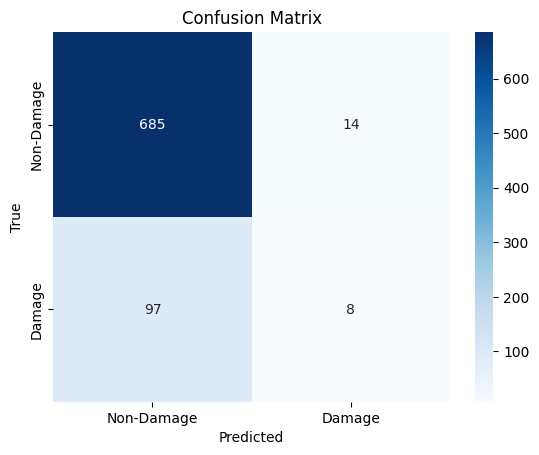

Confusion matrix plotted successfully.


In [46]:
# Plot the confusion matrix for the test set
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Damage', 'Damage'], yticklabels=['Non-Damage', 'Damage'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
print("Confusion matrix plotted successfully.")
